In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
filel = "/content/drive/MyDrive/machine_learning/insurance.csv"

In [3]:
mfl = pd.read_csv(filel)

In [4]:
mfl.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
mfl.shape

(1338, 7)

In [6]:
mfl.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
mfl.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
mfl['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
mfl['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [10]:
mfl['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Figure size 600x600 with 0 Axes>

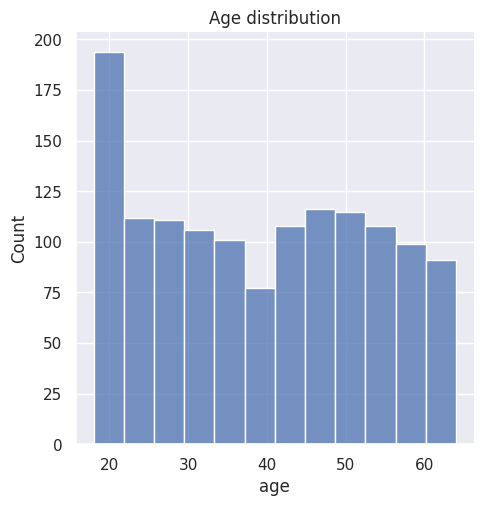

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(mfl['age'])
plt.title('Age distribution')
plt.show()

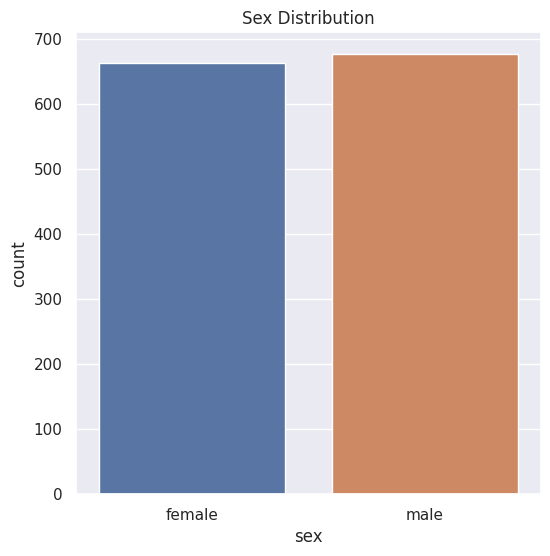

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=mfl)
plt.title('Sex Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

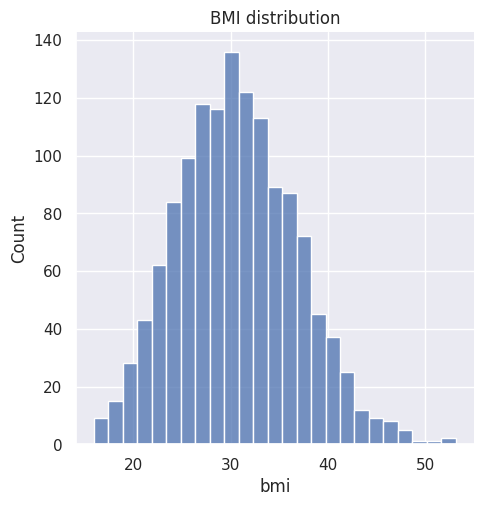

In [13]:
#BMI distribution
plt.figure(figsize=(6,6))
sns.displot(mfl['bmi'])
plt.title('BMI distribution')
plt.show()

Normal BMI range = 18.5 to 24.9

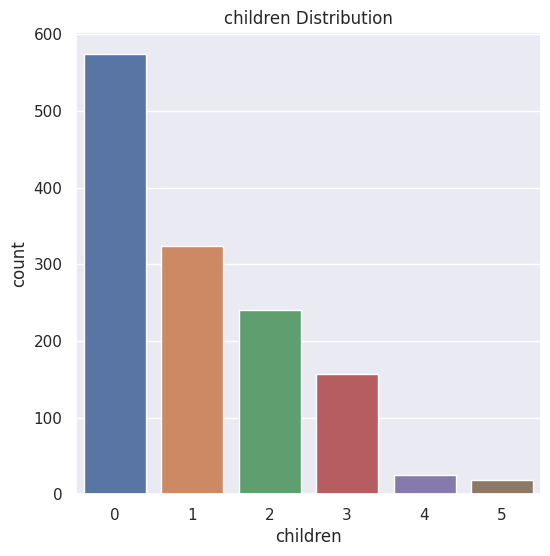

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=mfl)
plt.title('children Distribution')
plt.show()

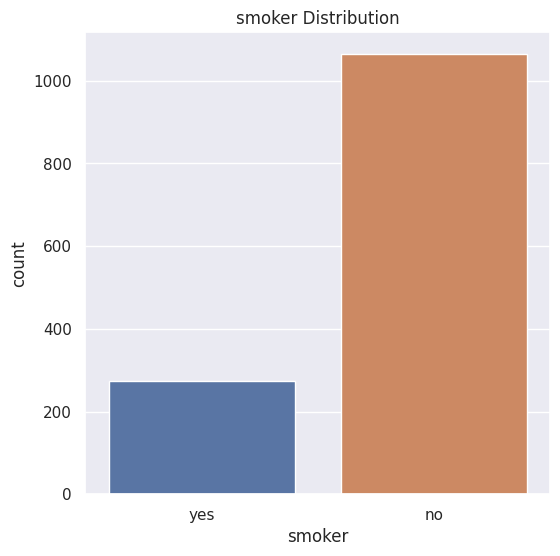

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=mfl)
plt.title('smoker Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

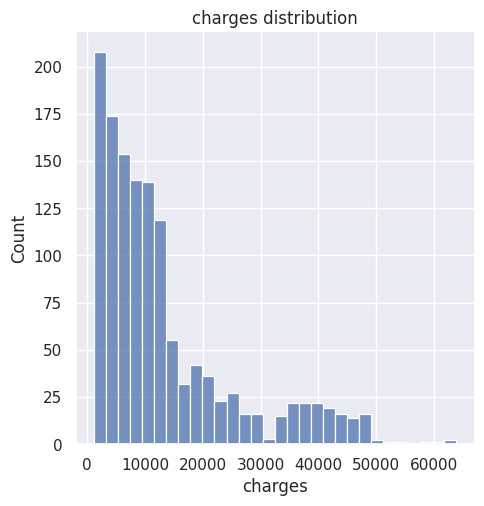

In [16]:

plt.figure(figsize=(6,6))
sns.displot(mfl['charges'])
plt.title('charges distribution')
plt.show()

Data pre - processing

encoding the categorical features

In [17]:
mfl.replace({'sex':{'male':0,'female':1}}, inplace=True)

mfl.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

mfl.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [18]:
mfl

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


splitting features and target

In [19]:
X = mfl.drop(columns='charges',axis=1)
Y = mfl['charges']

In [20]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


spliiting the data into training and testing data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training - Linear regression

In [23]:
regressor = LinearRegression()

In [24]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model evaluation

In [25]:
tdp = regressor.predict(X_train)

In [26]:
#R squared value

r2train = metrics.r2_score(Y_train, tdp)
print('R squared value :', r2train)

R squared value : 0.751505643411174


In [27]:
tesdp = regressor.predict(X_test)

In [28]:
#R squared value

r2test = metrics.r2_score(Y_test, tesdp)
print('R squared value :', r2test)

R squared value : 0.7447273869684076


Building a predictive system


In [29]:
inputd = (19,1,27.900,0,0,1)

idna = np.asarray(inputd)

inputdre = idna.reshape(1,-1)

prediction = regressor.predict(inputdre)
print("the insurance cost is USD", prediction)

the insurance cost is USD [25597.73941347]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
